## Import Libraries


In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## Load and clean dataset

In [18]:
#Load csv
df = pd.read_csv('vgsales.csv')
#Drop nulls
df = pd.dropna()
#Show dataset statistics
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Select Features and Target

In [19]:
# Define features and target for the video game sales dataset
features = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

X = df[features]     # Features
y = df['Global_Sales']  # Target


## Split the data


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,                # Features
    y,                # Target
    test_size=0.2,    # 20% test, 80% train
    random_state=42   # Reproducibility
)


## Train the Model


In [21]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(
    n_estimators=100,   # number of trees in the forest
    random_state=42     # for reproducibility
)

# Fit the model on training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Prediciton and Evaluation

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rsme = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.7557
R² Score: 0.8233


## Plot Feature Importance


<ipython-input-23-ab93762f388e>:13: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


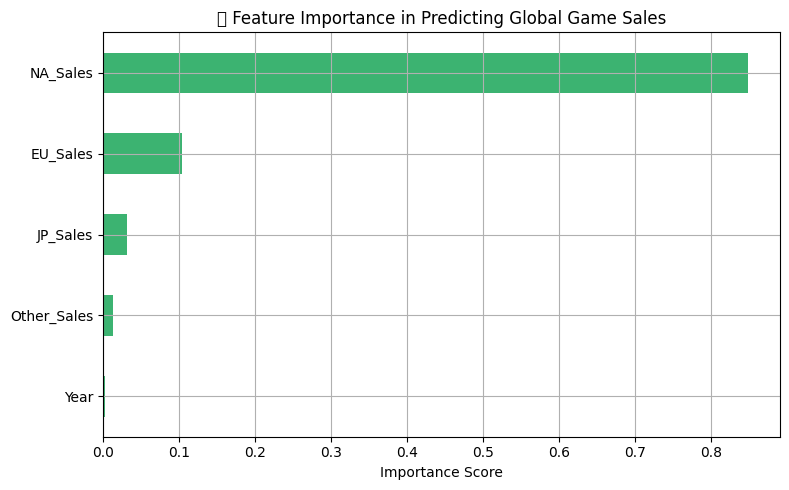

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Get and sort feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values()

# Plot
plt.figure(figsize=(8, 5))
feature_importances.plot(kind='barh', color='mediumseagreen')
plt.title('🎮 Feature Importance in Predicting Global Game Sales')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.grid(True)
plt.show()
